In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [16]:
df = pd.read_csv(r"F:\Internships\Shaadi Times\Datasets\london-air-quality.csv")

# Data Preprocessing


In [17]:
#To convert all objects to numeric and date time
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['pm25'] = pd.to_numeric(df['pm25'],errors='coerce')
df['pm10'] = pd.to_numeric(df['pm10'],errors='coerce')
df['o3'] = pd.to_numeric(df['o3'],errors='coerce')
df['no2'] = pd.to_numeric(df['no2'],errors='coerce')
df['so2'] = pd.to_numeric(df['so2'],errors='coerce')
df['co'] = pd.to_numeric(df['co'],errors='coerce')


In [20]:
df.isna().sum().sort_values(ascending = False)

so2     69
co      54
o3      43
no2     42
pm10     9
pm25     9
date     0
dtype: int64

In [21]:
#To drop NaN
df.isna().sum()
df = df.fillna(method = 'ffill')

In [22]:
# TO get an overview of London air quality
print(df['pm25'].mean())
print(df['pm10'].mean())
print(df['o3'].mean())
print(df['no2'].mean())
print(df['so2'].mean())
print(df['co'].mean())


64.47248495270851
26.548151332760103
24.791917454858126
40.774290627687016
4.092863284608771
5.293207222699914


In [23]:
#To make columns containing days, months and years
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)

#To make columns for weekdays and weekends
df['wday'] = df['date'].dt.day_name()
df['weekday'] = df['wday'].apply(lambda x: 0 if x == 'Saturday' or x == 'Sunday' else 1)

In [38]:
#df = df.reset_index()
df.set_index('date',inplace = True)

Text(0, 0.5, 'AQI')

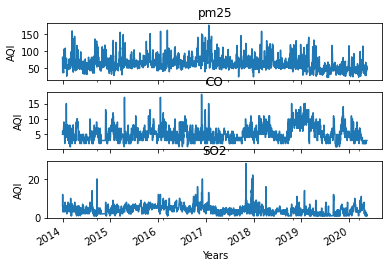

In [47]:
ax = plt.subplot(3,1,1)
df['pm25'].plot()
plt.title('pm25')
plt.xlabel('Years')
plt.ylabel('AQI')
plt.subplot(3,1,2, sharex = ax)
df['co'].plot()
plt.title('CO')
plt.xlabel('Years')
plt.ylabel('AQI')
plt.subplot(3,1,3, sharex = ax)
df['so2'].plot()
plt.title('SO2')
plt.xlabel('Years')
plt.ylabel('AQI')


In [44]:
df.sort_index(ascending=True, inplace = True)
df2 = df.loc['2016-01':'2020-05']



Text(0, 0.5, 'AQI')

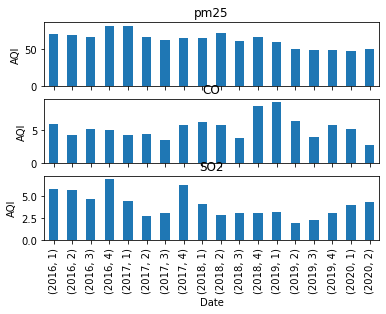

In [48]:
ax1 = plt.subplot(3,1,1)
df2['pm25'].groupby(by=[df2.index.year, df2.index.quarter]).mean().plot(kind='bar')
plt.title('pm25')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.subplot(3,1,2, sharex = ax1)
df2['co'].groupby(by=[df2.index.year, df2.index.quarter]).mean().plot(kind='bar')
plt.title('CO')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.subplot(3,1,3, sharex = ax1)
df2['so2'].groupby(by=[df2.index.year, df2.index.quarter]).mean().plot(kind='bar')
plt.title('SO2')
plt.xlabel('Date')
plt.ylabel('AQI')

In [49]:
df3 = df.loc['2019-06-01':'2020-05-01',:]

Text(0, 0.5, 'AQI')

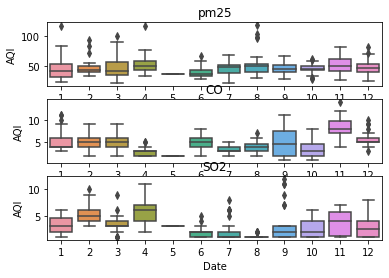

In [51]:
ax1 = plt.subplot(3,1,1)
sbn.boxplot(df3.month, df3.pm25)
plt.title('pm25')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.subplot(3,1,2, sharex = ax1)
sbn.boxplot(df3.month, df3.co)
plt.title('CO')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.subplot(3,1,3, sharex = ax1)
sbn.boxplot(df3.month, df3.so2)
plt.title('SO2')
plt.xlabel('Date')
plt.ylabel('AQI')

Text(0, 0.5, 'AQI')

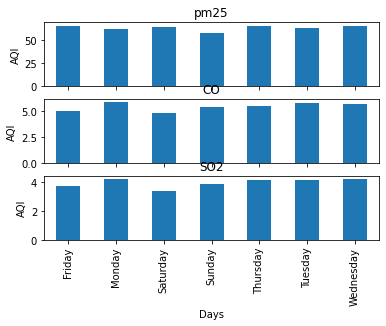

In [52]:
ax1 = plt.subplot(3,1,1)
df2.groupby('wday').pm25.mean().plot(kind='bar')
plt.title('pm25')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.subplot(3,1,2, sharex = ax1)
df2.groupby('wday').co.mean().plot(kind='bar')
plt.title('CO')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.subplot(3,1,3, sharex = ax1)
df2.groupby('wday').so2.mean().plot(kind='bar')
plt.title('SO2')
plt.xlabel('Days')
plt.ylabel('AQI')


# Forecasting


I've used fbprophet for the forecasting. The official documentation can be found [here](https://facebook.github.io/prophet/docs/quick_start.html).

In [53]:
from fbprophet import Prophet

df2 = df2.reset_index()
data_train = pd.DataFrame({'ds':df2['date'],
                          'y': df2['co']})

Importing plotly failed. Interactive plots will not work.


In [54]:
#Fit the data
pro = Prophet(n_changepoints=35, yearly_seasonality = True, daily_seasonality = True, changepoint_prior_scale = 0.03)
pro.fit(data_train)

In [55]:
#Predict
future= pro.make_future_dataframe(periods=1460)
forecast=pro.predict(future)

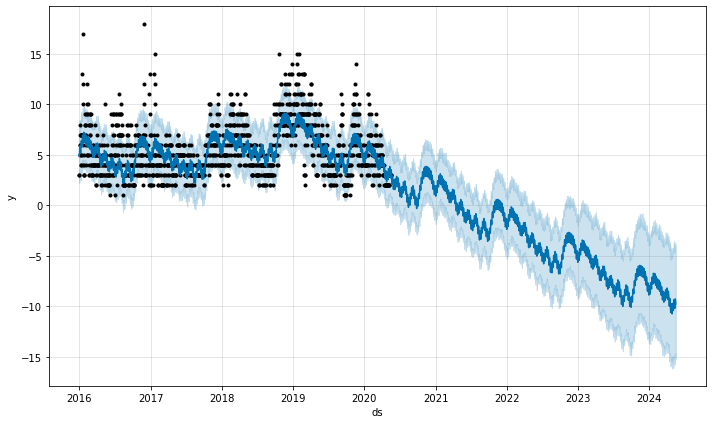

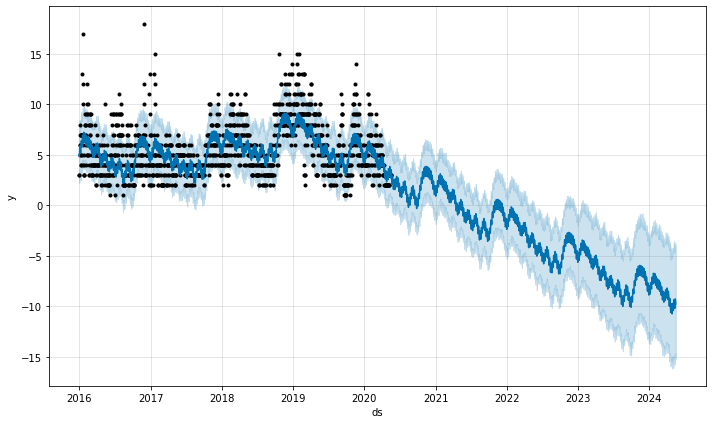

In [56]:
pro.plot(forecast)

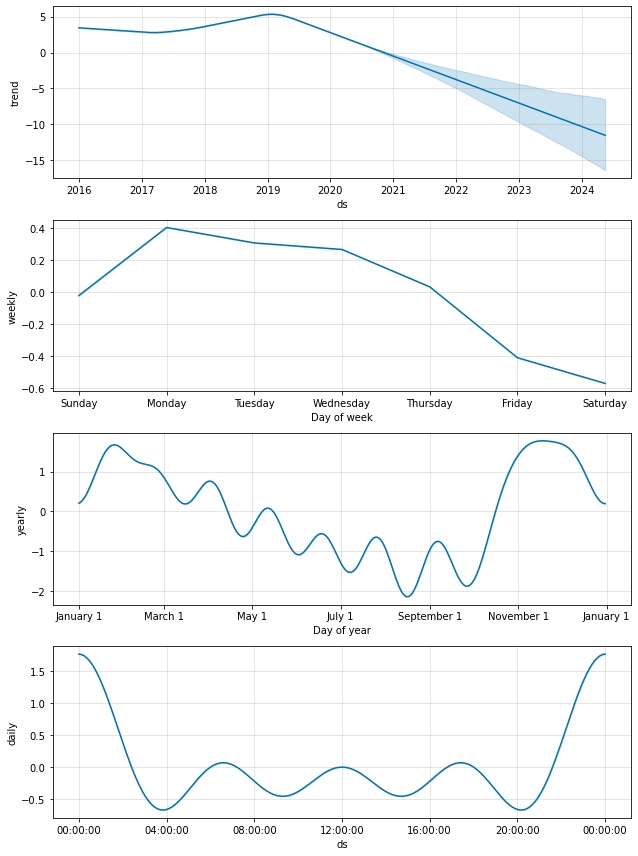

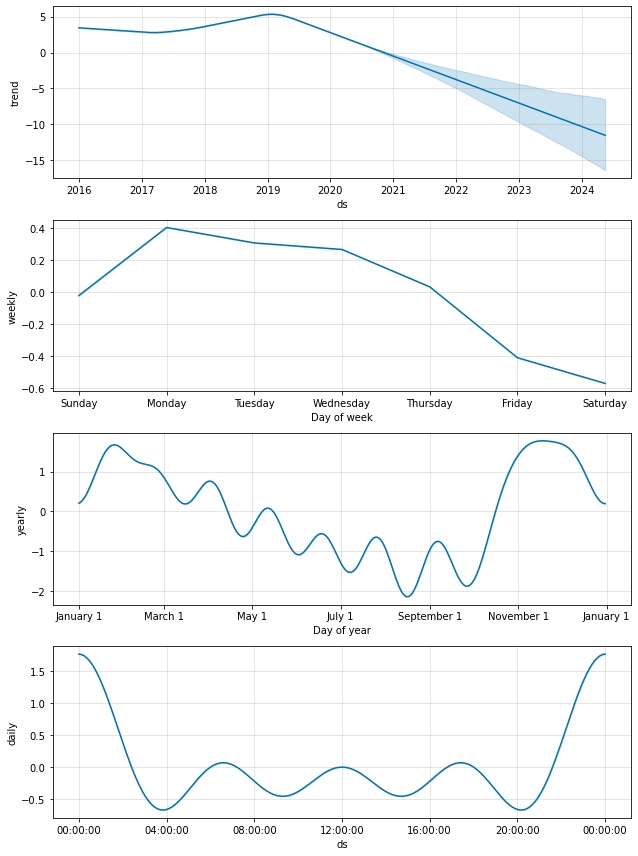

In [57]:
pro.plot_components(forecast)

In [58]:
#Calculate error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
forecast_pred = forecast.loc[0:1596,['ds','yhat']]

mean_absolute_error(data_train.y, forecast_pred.yhat)

1.589399367153189